In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install Sastrawi

In [12]:
!pip install rouge-score

In [13]:
import pandas as pd
from rouge_score import rouge_scorer
import os

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def compute_tp_fp_fn(reference, system):
    ref_words = set(reference.lower().split())
    sys_words = set(system.lower().split())

    tp = len(ref_words & sys_words)
    fp = len(sys_words - ref_words)
    fn = len(ref_words - sys_words)

    return tp, fp, fn

def evaluate_mmr_combined(system_dir, reference_dir, metode_label):
    records = []
    for i in range(1, 101):  # untuk 500 dokumen, sesuaikan jika lebih
        doc_id = f"S{i}.txt"
        sys_path = os.path.join(system_dir, doc_id)
        ref_path = os.path.join(reference_dir, doc_id)

        with open(sys_path, 'r') as sys_file, open(ref_path, 'r') as ref_file:
            sys_summary = sys_file.read()
            ref_summary = ref_file.read()

        rouge_scores = scorer.score(ref_summary, sys_summary)
        tp, fp, fn = compute_tp_fp_fn(ref_summary, sys_summary)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

        record = {
            "Dokumen": f"S{i}",
            "Metode": metode_label,
            "rouge1": rouge_scores["rouge1"].fmeasure,
            "rouge2": rouge_scores["rouge2"].fmeasure,
            "rougeL": rouge_scores["rougeL"].fmeasure,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "TP": tp,
            "FP": fp,
            "FN": fn
        }
        records.append(record)

    return records

In [14]:
# Path direktori
ref_dir = "/content/drive/MyDrive/Summarization_MMR/ringkasan_ahli/30_persen/"
cos_dir = "/content/drive/MyDrive/Summarization_MMR/ringkasan_mmr_cosine/"
euc_dir = "/content/drive/MyDrive/Summarization_MMR/ringkasan_mmr_euclidean/"

# Evaluasi
cosine_results = evaluate_mmr_combined(cos_dir, ref_dir, "MMR_Cosine")
euclidean_results = evaluate_mmr_combined(euc_dir, ref_dir, "MMR_Euclidean")

# Gabungkan & simpan
df_all = pd.DataFrame(cosine_results + euclidean_results)
df_all.to_csv("/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_100_dokumen.csv", index=False)

print("✅ Evaluasi selesai dan disimpan sebagai 'Evaluasi_MMR_100_dokumen.csv'")

✅ Evaluasi selesai dan disimpan sebagai 'Evaluasi_MMR_100_dokumen.csv'


In [15]:
# Gabungkan & buat DataFrame
df_all = pd.DataFrame(cosine_results + euclidean_results)

# Tambahkan kolom angka index dokumen untuk sorting (tanpa 'S')
df_all['DocIndex'] = df_all['Dokumen'].str.extract(r'S(\d+)').astype(int)

# Urutkan berdasarkan DocIndex dan Metode (agar Cosine-Euclidean selang-seling)
df_all = df_all.sort_values(by=['DocIndex', 'Metode'])

# Buang kolom bantu
df_all = df_all.drop(columns=['DocIndex'])

# Simpan ke CSV
df_all.to_csv("/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_Final.csv", index=False)

print("✅ Hasil evaluasi disimpan dalam urutan selang-seling per dokumen.")


✅ Hasil evaluasi disimpan dalam urutan selang-seling per dokumen.


In [16]:
# Simpan hasil terpisah berdasarkan metode
df_cosine_only = df_all[df_all['Metode'] == 'MMR_Cosine']
df_euclidean_only = df_all[df_all['Metode'] == 'MMR_Euclidean']

# Simpan ke CSV masing-masing
df_cosine_only.to_csv("/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_Cosine.csv", index=False)
df_euclidean_only.to_csv("/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_Euclidean.csv", index=False)

print("✅ Hasil evaluasi terpisah berhasil disimpan.")

✅ Hasil evaluasi terpisah berhasil disimpan.


In [18]:
# Install nltk jika belum terinstall
!pip install nltk

# Import yang benar
from nltk.tokenize import sent_tokenize

# Download data punkt (satu kali saja)
import nltk
nltk.download('punkt_tab')

# Sekarang fungsi sent_tokenize bisa digunakan
def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [19]:
# Lokasi file
dir_asli = "/content/drive/MyDrive/Summarization_MMR/teks_asli/"
dir_ahli = "/content/drive/MyDrive/Summarization_MMR/ringkasan_ahli/30_persen/"
dir_cosine = "/content/drive/MyDrive/Summarization_MMR/ringkasan_mmr_cosine/"
dir_euclidean = "/content/drive/MyDrive/Summarization_MMR/ringkasan_mmr_euclidean/"

def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

records = []

for i in range(1, 101):
    with open(os.path.join(dir_asli, f"{i}.txt")) as f: teks_asli = f.read()
    with open(os.path.join(dir_ahli, f"S{i}.txt")) as f: ringkasan_ahli = f.read()
    with open(os.path.join(dir_cosine, f"S{i}.txt")) as f: ringkasan_cosine = f.read()
    with open(os.path.join(dir_euclidean, f"S{i}.txt")) as f: ringkasan_euclidean = f.read()

    records.append({
        "No": i,
        "Kalimat Teks Asli": count_sentences(teks_asli),
        "Ringkasan Ahli": count_sentences(ringkasan_ahli),
        "Ringkasan Cosine": count_sentences(ringkasan_cosine),
        "Ringkasan Euclidean": count_sentences(ringkasan_euclidean)
    })

# Simpan ke file CSV
df = pd.DataFrame(records)
df.to_csv("/content/drive/MyDrive/Summarization_MMR/Tabel_Jumlah_Kalimat.csv", index=False)

In [20]:
import pandas as pd

# Baca file hasil evaluasi (pastikan formatnya benar)
df = pd.read_csv('/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_Final.csv')

# Pisahkan baris ganjil (Cosine) dan genap (Euclidean)
df_cosine = df.iloc[::2].reset_index(drop=True)     # Baris 0,2,4,... (Cosine)
df_euclidean = df.iloc[1::2].reset_index(drop=True) # Baris 1,3,5,... (Euclidean)

# Hitung rata-rata untuk tiap metrik
mean_cosine = df_cosine[['Precision', 'Recall', 'F1-Score']].mean()
mean_euclidean = df_euclidean[['Precision', 'Recall', 'F1-Score']].mean()

# Tampilkan hasil
print("Rata-rata Evaluasi MMR Cosine:")
print(mean_cosine)
print("\nRata-rata Evaluasi MMR Euclidean:")
print(mean_euclidean)

Rata-rata Evaluasi MMR Cosine:
Precision    0.521994
Recall       0.521305
F1-Score     0.516548
dtype: float64

Rata-rata Evaluasi MMR Euclidean:
Precision    0.550840
Recall       0.688553
F1-Score     0.607027
dtype: float64


🔹 Rata-rata Evaluasi MMR Cosine (dalam %):
Precision    52.20
Recall       52.13
F1-Score     51.65
dtype: float64

🔸 Rata-rata Evaluasi MMR Euclidean (dalam %):
Precision    55.08
Recall       68.86
F1-Score     60.70
dtype: float64


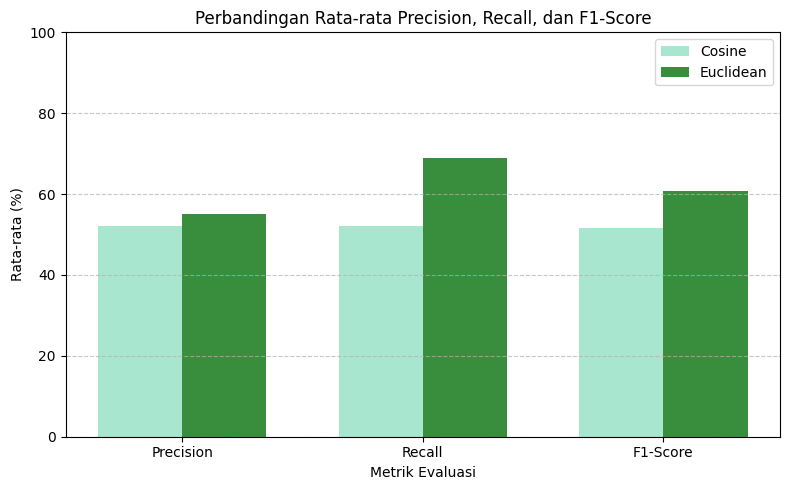

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca file evaluasi
df = pd.read_csv('/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_Final.csv')

# 2. Pisahkan metode Cosine (baris ganjil) dan Euclidean (baris genap)
df_cosine = df.iloc[::2].reset_index(drop=True)
df_euclidean = df.iloc[1::2].reset_index(drop=True)

# 3. Hitung rata-rata
mean_cosine = df_cosine[['Precision', 'Recall', 'F1-Score']].mean()
mean_euclidean = df_euclidean[['Precision', 'Recall', 'F1-Score']].mean()

# 4. Konversi ke persen
mean_cosine_percent = mean_cosine * 100
mean_euclidean_percent = mean_euclidean * 100

# 5. Tampilkan nilai rata-rata persen
print("🔹 Rata-rata Evaluasi MMR Cosine (dalam %):")
print(mean_cosine_percent.round(2))

print("\n🔸 Rata-rata Evaluasi MMR Euclidean (dalam %):")
print(mean_euclidean_percent.round(2))

# 6. Plot grafik
metrik = ['Precision', 'Recall', 'F1-Score']
x = range(len(metrik))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], mean_cosine_percent, width=width, label='Cosine', color='#A8E6CF')      # hijau muda
plt.bar([i + width/2 for i in x], mean_euclidean_percent, width=width, label='Euclidean', color='#388E3C') # hijau tua

# Styling
plt.xlabel('Metrik Evaluasi')
plt.ylabel('Rata-rata (%)')
plt.title('Perbandingan Rata-rata Precision, Recall, dan F1-Score')
plt.xticks(x, metrik)
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 🔽 SIMPAN ke Google Drive
plt.savefig('/content/drive/MyDrive/Summarization_MMR/grafik_penelitian/grafik_evaluasi_mmr.png', dpi=300, bbox_inches='tight')

# TAMPILKAN
plt.show()

In [23]:
import pandas as pd

# 1. Baca file evaluasi
df = pd.read_csv('/content/drive/MyDrive/Summarization_MMR/Evaluasi_MMR_Final.csv')

# 2. Ambil kolom TP, FP, FN saja
confusion_cols = ['TP', 'FP', 'FN']

# 3. Bagi dua: baris genap (Cosine), baris ganjil (Euclidean)
df_cosine = df.iloc[::2][confusion_cols].reset_index(drop=True)
df_euclidean = df.iloc[1::2][confusion_cols].reset_index(drop=True)

# 4. Hitung rata-rata
avg_conf_cosine = df_cosine.mean().round(2)
avg_conf_euclidean = df_euclidean.mean().round(2)

# 5. Tampilkan hasil
print("🔹 Rata-rata Confusion Matrix (Tanpa TN) - MMR Cosine:")
print(avg_conf_cosine)

print("\n🔸 Rata-rata Confusion Matrix (Tanpa TN) - MMR Euclidean:")
print(avg_conf_euclidean)


🔹 Rata-rata Confusion Matrix (Tanpa TN) - MMR Cosine:
TP    66.49
FP    61.75
FN    60.51
dtype: float64

🔸 Rata-rata Confusion Matrix (Tanpa TN) - MMR Euclidean:
TP    86.99
FP    72.56
FN    40.01
dtype: float64


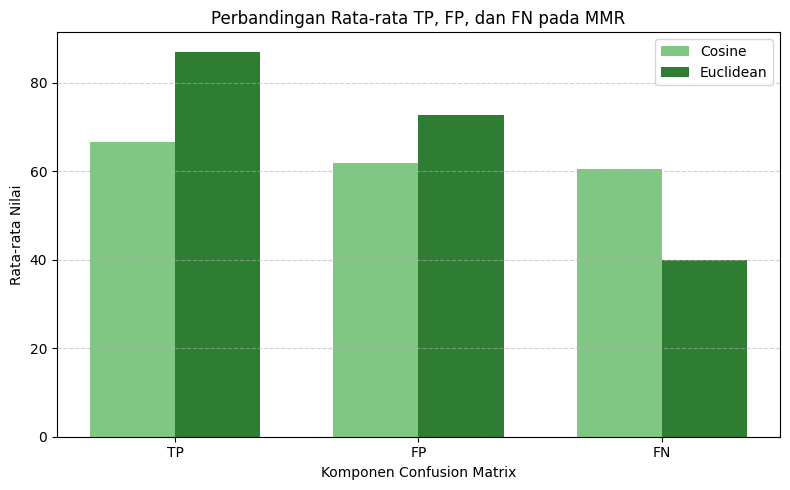

In [24]:
import matplotlib.pyplot as plt

# 1. Data untuk grafik
labels = ['TP', 'FP', 'FN']
cosine_vals = avg_conf_cosine.values
euclidean_vals = avg_conf_euclidean.values
x = range(len(labels))
width = 0.35

# 2. Buat grafik
plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], cosine_vals, width=width, label='Cosine', color='#81C784')     # hijau medium
plt.bar([i + width/2 for i in x], euclidean_vals, width=width, label='Euclidean', color='#2E7D32') # hijau gelap

# 3. Styling
plt.xlabel('Komponen Confusion Matrix')
plt.ylabel('Rata-rata Nilai')
plt.title('Perbandingan Rata-rata TP, FP, dan FN pada MMR')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 4. Simpan ke Google Drive
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Summarization_MMR/grafik_penelitian/grafik_confusion_matrix_mmr.png', dpi=300, bbox_inches='tight')

# 5. Tampilkan grafik
plt.show()